In [27]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [32]:
def get_mean(df):

    scaler = MinMaxScaler()

    data = df[['Popularity', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo']]

    df[['Popularity', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo']] = scaler.fit_transform(df[['Popularity', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo']])

    list1 = list(df.mean(axis=0))
    
    avg_features_df = pd.DataFrame(data = list1 , index = ['Duration_ms','Popularity','Explicit', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo','Time_Signature'])
    
    
    
    avg_features_df = avg_features_df.transpose()

    avg_features_df.drop(['Duration_ms','Explicit','Time_Signature'] , axis = 1,inplace = True)
    
    elements = [0,2,12]
    
    for ele in sorted(elements, reverse = True):  
        del list1[ele]  
    
    return list1

In [34]:
average = pd.read_csv(r'C:\Users\ROSHAN\Titofy\Average.csv', encoding= 'unicode_escape')

In [35]:
average.head()

,Popularity,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Tempo
0,0.480712,0.587442,0.626361,0.478697,0.630858,0.070171,0.297199,0.096775,0.163884,0.429465


In [36]:
avg_mean = average.iloc[0]

avg_mean = list(avg_mean)

In [37]:
avg_mean

[0.4807123837632986,
 0.5874416985086583,
 0.6263614090145682,
 0.4786966906886067,
 0.6308577904744037,
 0.07017105137936096,
 0.29719858029762986,
 0.0967749982407348,
 0.16388443232663638,
 0.4294650354640282]

In [38]:
def features1(df):
    
    features = []
    
    user_mean = get_mean(df)

    for i in range(0, len(user_mean)):
    
        if (user_mean[i] > avg_mean[i]):
        
            features.append(1)
    
        elif (user_mean[i] == avg_mean[i]):
        
            features.append(1)
        
        elif (user_mean[i] < avg_mean[i]):
        
            features.append(0)
            
    return features

In [39]:
features1(df)

[1, 0, 1, 1, 1, 1, 0, 0, 1, 0]

In [40]:
dataframe_combined = pd.read_csv(r'C:\Users\ROSHAN\Titofy\Combined.csv' , encoding= 'unicode_escape')

In [41]:
dataframe_combined['Username'].nunique()

51

In [42]:
dataframe_combined.drop_duplicates(subset=['Track_ID'] , inplace = True)

In [43]:
usernames = list(dataframe_combined['Username'].unique())
usernames

['Hri7ik Barthwal',
 'Tye Copes',
 'Abbs Soltani',
 'pansy',
 'Ralaperher',
 'Pratyaksha',
 'Ishan Saxena',
 'Ahmad Ayyad',
 'fiftygame',
 'Prashant Agarwal',
 'Apurva Bhardwaj',
 'fridonora',
 'Rudrapriya Yadav',
 'Akshita Vaidya',
 'Joohee',
 'Pola',
 'Jayant Benjamin ',
 'Sahil Rao',
 'Samridhi Diwan',
 'Sukanya Dubey',
 'Surabhi Shrivastava',
 'Anshuman',
 'ircatokft78qqfhr7dpe325x0',
 'Anushree',
 'Bhallaboy',
 'skinnyparadox',
 'Slavvy Coelho',
 'Light',
 'Pulkit Batra',
 'Smruthi',
 'Anvay Gumaste',
 'Harshil Gupta',
 'Abhishek Yerra',
 'bsj7ilxbmjjqgd7wz89ogtug1',
 'Preet Randhawa ',
 'Swapnil Kadam',
 '21gznxiudjkfpw532rubhop4q',
 'Srujai Varikuti',
 'Arjun Nemani',
 'Akshay Jaggi',
 'Devansh Shah',
 'akrutikushwaha',
 'Subha Karanam',
 'Aditi Agrawal',
 'Yorke',
 'Niyati Jain',
 'Avadh7x',
 'fthdx9hb3u2t3knrq3fsic01y',
 'Ritika Kayal',
 'Rohan.Muj',
 'Mahima Narayan']

In [44]:
def get_features_all(dataframe_combined):
    
    s1 = []
    
    usernames = list(dataframe_combined['Username'].unique())
    
    s = []
    
    for i in usernames:
        
        df_username = dataframe_combined[dataframe_combined['Username'] == i]
        
        s = features1(df_username)
        
        s1.append(s)  
    
    return s1
        
all_features = get_features_all(dataframe_combined)       

C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ROSHAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ROSHAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ROSHAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ROSHAN\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ROSHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [45]:
all_features

[[1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 1, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
 [1, 1, 0, 1, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [1, 1, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
 [1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
 [1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 0, 1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 1, 1, 0, 1, 0],
 [1, 0, 0, 0, 0, 1, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 0],
 [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1,

In [46]:
import numpy as np
all_features = np.asarray(all_features)

In [47]:
all_features.shape

(51, 10)

# Padding

In [80]:
import glob
import os
import pandas as pd

folder_name = r"C:\Users\ROSHAN\Titofy\Data"
file_type = 'csv'
seperator =','
filenames = os.listdir(folder_name)
print(filenames)

df_list = []
for f in glob.glob(folder_name + "/*."+file_type):
    dd = pd.read_csv(f, sep=seperator,encoding= 'unicode_escape') 
    df_list.append(dd)

len(df_list)

['Playlists_Of_User1.csv', 'Playlists_Of_User10.csv', 'Playlists_Of_User11.csv', 'Playlists_Of_User12.csv', 'Playlists_Of_User13.csv', 'Playlists_Of_User14.csv', 'Playlists_Of_User15.csv', 'Playlists_Of_User16.csv', 'Playlists_Of_User17.csv', 'Playlists_Of_User18.csv', 'Playlists_Of_User19.csv', 'Playlists_Of_User2.csv', 'Playlists_Of_User20.csv', 'Playlists_Of_User21.csv', 'Playlists_Of_User22.csv', 'Playlists_Of_User23.csv', 'Playlists_Of_User24.csv', 'Playlists_Of_User25.csv', 'Playlists_Of_User26.csv', 'Playlists_Of_User27.csv', 'Playlists_Of_User28.csv', 'Playlists_Of_User29.csv', 'Playlists_Of_User3.csv', 'Playlists_Of_User30.csv', 'Playlists_Of_User31.csv', 'Playlists_Of_User32.csv', 'Playlists_Of_User33.csv', 'Playlists_Of_User34.csv', 'Playlists_Of_User35.csv', 'Playlists_Of_User36.csv', 'Playlists_Of_User37.csv', 'Playlists_Of_User38.csv', 'Playlists_Of_User39.csv', 'Playlists_Of_User4.csv', 'Playlists_Of_User40.csv', 'Playlists_Of_User41.csv', 'Playlists_Of_User42.csv', 'Pla

51

In [81]:
def remove_error(df_list):
    
    df_list_new = []
    
    for i in df_list:
        
        i = i[i["Popularity"] != "Popularity"]
        
        df_list_new.append(i)
        
    return df_list_new

df_list = remove_error(df_list)

In [82]:
for dataframe in df_list:
    print(dataframe[dataframe['Popularity']=='Popularity'].index.values)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [83]:
import numpy as np

def padding(df_list): 

    dataframe_list = []

    for i in df_list:

        len1 = len(i)

        remaining = 500-len1

        #print(remaining)

        d = pd.DataFrame(np.zeros((remaining, 21)) , columns = i.columns)

        i = i.append(d)

        dataframe_list.append(i)

    X = []
    
    for i in dataframe_list:

        features_only = i[['Popularity', 'Danceability','Energy', 'Key', 'Loudness', 'Speechiness',
                               'Acousticness', 'Instrumentalness', 'Liveness', 'Tempo']]

        X.append(features_only.values)

    X = np.asarray(X)
    
    return X

X = padding(df_list)

In [84]:
X.shape

(51, 500, 10)

In [131]:
X[0]

array([[65.0, 0.9109999999999999, 0.255, ..., 0.000246, 0.0937, 137.994],
       [8.0, 0.774, 0.281, ..., 0.0249, 0.105, 140.086],
       [71.0, 0.55, 0.271, ..., 3.21e-06, 0.107, 111.344],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [85]:
with open('y.npy', 'wb') as f:
    np.save(f, all_features)

In [86]:
with open('X.npy', 'wb') as f:
    np.save(f, X)

In [56]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Dropout, SimpleRNN

Using TensorFlow backend.


In [90]:
new_features =model.predict(X)

In [91]:
new_features

array([[0.72279173, 0.1963503 , 0.5733094 , 0.46247166, 0.38066867,
        0.8813068 , 0.5640185 , 0.39725944, 0.58219105, 0.28867063],
       [0.72279173, 0.19635029, 0.5733095 , 0.46247172, 0.38066858,
        0.8813068 , 0.5640186 , 0.39725944, 0.5821911 , 0.28867066],
       [0.72279173, 0.19635025, 0.5733094 , 0.46247172, 0.38066867,
        0.8813068 , 0.56401855, 0.39725947, 0.5821911 , 0.2886707 ],
       [0.7227917 , 0.19635026, 0.5733095 , 0.46247172, 0.38066864,
        0.8813068 , 0.56401855, 0.39725935, 0.5821912 , 0.28867063],
       [0.7227918 , 0.19635022, 0.5733094 , 0.46247172, 0.38066867,
        0.8813068 , 0.56401855, 0.39725947, 0.5821911 , 0.28867072],
       [0.7227917 , 0.19635025, 0.5733095 , 0.46247166, 0.3806687 ,
        0.8813068 , 0.56401855, 0.3972595 , 0.5821911 , 0.2886707 ],
       [0.72279173, 0.19635025, 0.5733094 , 0.4624718 , 0.3806687 ,
        0.8813068 , 0.5640184 , 0.3972595 , 0.5821911 , 0.28867066],
       [0.72279173, 0.19635026, 0.5733095

In [99]:
all_features.shape

(51, 10)

In [116]:
newX = np.load(r'C:\Users\ROSHAN\Titofy\Xtransformed.npy')

In [117]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(newX)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.278744,-0.271780,0.237031,-0.178785,-0.180715,0.124087,-0.203571,-0.086847,-0.160350,-0.019600
1,-0.721588,-0.076404,0.008368,0.649759,-0.286665,-0.222878,0.409602,-0.034610,-0.277361,-0.037452
2,0.698704,-0.055562,0.218172,0.640441,-0.291884,-0.187624,-0.170218,-0.011168,0.164455,0.088210
3,1.013128,0.599443,-0.510830,0.364057,-0.342402,-0.016201,-0.030538,0.234589,0.019663,0.001721
4,0.902895,0.003048,-0.418466,-0.496457,0.338081,-0.332040,0.225550,-0.063835,0.213233,-0.221432


In [118]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26626572, 0.18883681, 0.14568977, 0.1117098 , 0.0960388 ,
       0.0641815 , 0.04843146, 0.03762902, 0.02868448, 0.01253267],
      dtype=float32)

In [119]:
x_pca=x_pca[[0,1]]
x_pca.head()

,0,1
0,-0.278744,-0.271780
1,-0.721588,-0.076404
2,0.698704,-0.055562
3,1.013128,0.599443
4,0.902895,0.003048
5,0.178286,-0.113439
6,0.073699,-0.307612
7,0.033734,0.143112
8,-0.049933,0.133845
9,-0.025223,-0.041769


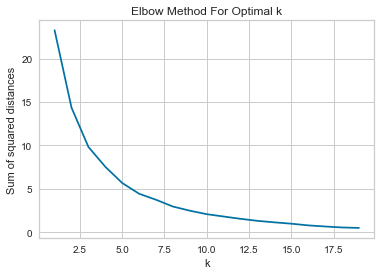

In [120]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ss_dist = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(x_pca)
    ss_dist.append(km.inertia_)
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

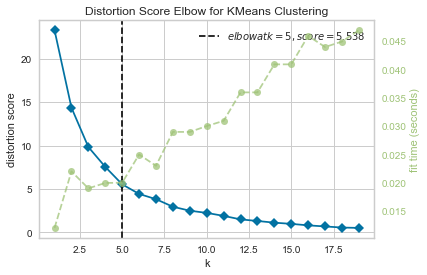

In [121]:

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(km, k=(1,20))
visualizer.fit(x_pca)
visualizer.show()

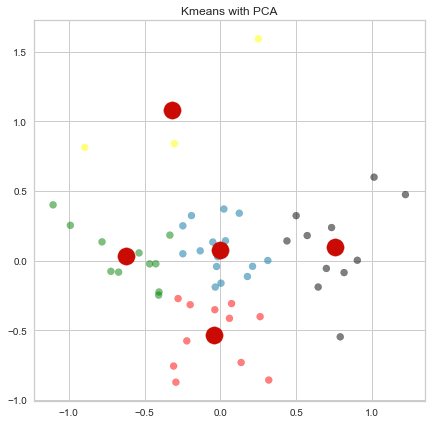

In [122]:
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_kmeans=kmeans.fit_predict(x_pca)


LABEL_COLOR_MAP = {0:'black', 1: 'green', 2: 'b',3: 'red',4:'yellow'}
label_color = [LABEL_COLOR_MAP[l] for l in y_kmeans]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c= label_color, alpha=0.5) 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='r')
plt.title("Kmeans with PCA")
plt.savefig('Kmeans with PCA.png', dpi=75, bbox_inches='tight')
plt.show()

In [123]:
x_pca['label_Kmeans_PCA'] = kmeans.labels_
x_pca.head()

,0,1,label_Kmeans_PCA
0,-0.278744,-0.271780,3
1,-0.721588,-0.076404,1
2,0.698704,-0.055562,0
3,1.013128,0.599443,0
4,0.902895,0.003048,0
5,0.178286,-0.113439,2
6,0.073699,-0.307612,3
7,0.033734,0.143112,2
8,-0.049933,0.133845,2
9,-0.025223,-0.041769,2


In [134]:
# dict1 = {}
# count =  0
# for i in x_pca['label_Kmeans_PCA']:
#     dict1[count] = i
    
#     count += 1
    
labels = [[],[],[],[],[]]
count = 0 
for i in x_pca['label_Kmeans_PCA']:
    
    if (i==0):
        
        labels[0].append(count)
    elif (i==1):
        
        labels[1].append(count)
        
    elif (i==2):
        
        labels[2].append(count)

    elif (i==3):
        
        labels[3].append(count)
        
    elif (i==4):
        
        labels[4].append(count)
        
    count += 1

In [139]:
labels = np.asarray(labels)

with open('labels.npy', 'wb') as f:
    np.save(f, labels)